# Lab #1

#### Joseph Livesey

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

As we discussed in lecture, the "sigma" value of a given measurement corresponds to the probability of obtaining that measurement from some background distribution. Our first task is to determine the probabilities corresponding to some different "sigma" values, to better understand what is meant. Let's try several from $0.25\sigma$ to $5\sigma$.

The standard normal distribution $\mathcal{N}(0,1)$ is centered on $\mu=0$ has a standard deviation of $\sigma=1$. As a result, computing the cumulative distribution function (CDF) at some value $x_\text{max}$ and subtracting 1 gives the probability that we measure $x \geq x_\text{max}$, and this is the probability corresponding to $x_\text{max}\sigma$. So if we, for instance, want to determine the probability corresponding to $5\sigma$, we must compute $1 - \text{cdf}(x_\text{max})$ at $x_\text{max} = 5$.

In [2]:
i = 0
while i < 5:
    i += 0.25
    print( str(i)+"σ: "+str(1 - stats.norm.cdf(i)) )

0.25σ: 0.4012936743170763
0.5σ: 0.3085375387259869
0.75σ: 0.22662735237686826
1.0σ: 0.15865525393145707
1.25σ: 0.10564977366685535
1.5σ: 0.06680720126885809
1.75σ: 0.040059156863817114
2.0σ: 0.02275013194817921
2.25σ: 0.012224472655044671
2.5σ: 0.006209665325776159
2.75σ: 0.0029797632350545555
3.0σ: 0.0013498980316301035
3.25σ: 0.0005770250423907664
3.5σ: 0.0002326290790355401
3.75σ: 8.841728520081471e-05
4.0σ: 3.167124183311998e-05
4.25σ: 1.0688525774904534e-05
4.5σ: 3.3976731247387093e-06
4.75σ: 1.017083242516037e-06
5.0σ: 2.866515719235352e-07


These match (1 minus) the values in the $z$-score table in Appendix E of *Introduction to Probability* by Anderson, Seppäläinen, & Valkó.

Using the CDF values we calculated already for the integer "sigma" values, we will verify using the point percent function that they correspond to the appropriate number $x_\text{max}$ of standard deviations. We can do this using the *point percent function* (PPF), effectively the inverse of the CDF.

In [3]:
probs = [0.15865525393145707, 0.02275013194817921, 0.0013498980316301035, 3.167124183311998e-05, 2.866515719235352e-07]
for p in probs:
    print( str(p)+": "+str(stats.norm.ppf(p)) )

0.15865525393145707: -1.0
0.02275013194817921: -2.0000000000000004
0.0013498980316301035: -2.9999999999999982
3.167124183311998e-05: -4.0
2.866515719235352e-07: -4.999999999970176


These agree very well with the known number of standard deviations for each measurement. However, a minus sign appears for all of them. This happened because we are using the values we calculated for $1 - \text{cdf}(x_\text{max})$. Essentially, we integrated over $[x_\text{max}, \infty)$, but the PPF function in `scipy.stats` treats the situation as if we integrated over $(-\infty, x_\text{max}]$. Hence, due to the symmetry of the Gaussian curve, it has returned the value of $-x_\text{max}$.

We'll now consider another continuous distribution: the Rayleigh distribution. The probability density function of the Rayleigh distribution is

$$ \text{pdf}(x) = \frac{x}{\sigma^2} \exp \left ( -\frac{x^2}{2\sigma^2} \right ). $$

The distribution we implement using `scipy.stats.rayleigh` sets $\sigma=1$. Let's make a histogram and curve corresponding to this distribution.

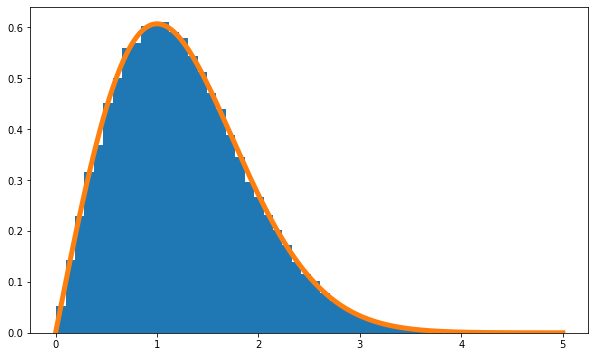

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.hist(stats.rayleigh.rvs(size=100000), 50, density=True)
x = np.linspace(0, 5, 1000)
ax.plot(x, stats.rayleigh.pdf(x), linewidth=5)
plt.show();

Let's assume we made a measurement in the presence of a Rayleigh-distributed background. Take arbitrarily a hypothetical measurement at $x_0=1.8$. I would like to determine the probability that this was a false measurement, i.e. that my signal-free data produced a signal that is equally or more signal-like that what I observed. Stated in integral form, I want to find the probability
$$ p(x_0) = \int_{x_0}^\infty \text{pdf}(x) \: dx $$
This is equivalent to finding $1 - \text{cdf}(x_0)$.

In [5]:
x0 = 1.8
print( 1 - stats.rayleigh.cdf(x0) )

0.19789869908361468


There appears to be a $19.8\%$ chance that the background produced the measured signal. This probability corresponds to a certain number of standard deviations away from the mean of the normal distribution:

In [6]:
stats.norm.ppf( stats.rayleigh.cdf(x0) )

0.8491507784123539

This is a $0.85\sigma$ measurement.

We would like to find the sigma values of many different possible measurements against this background. Let's just do all of them. The green line in the following plot shows the corresponding number of sigmas as a function of $x$.

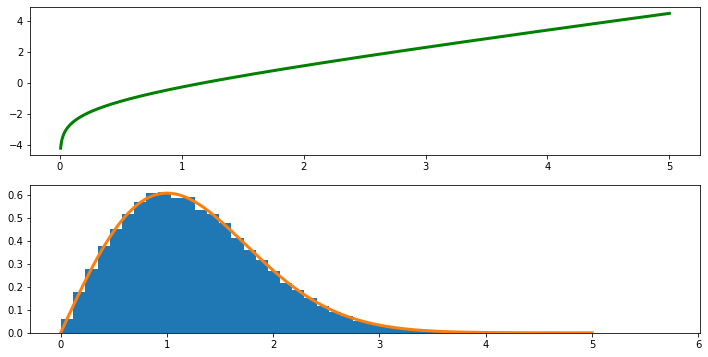

In [7]:
x = np.linspace(0, 5, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x, stats.norm.ppf( stats.rayleigh.cdf(x) ), c='g', linewidth=3)
ax[1].hist(stats.rayleigh.rvs(size=100000), 50, density=True)
ax[1].plot(x, stats.rayleigh.pdf(x), linewidth=3)
plt.show();

As expected, the resulting curve is asymmetric, since there is a small chance of false signals at large values of $x$, but this probability falls off to zero at $x=0$ with the Rayleigh distribution.

In [8]:
stats.rayleigh.ppf(0.5)

1.1774100225154747

The position of $0\sigma$ is $x \approx 1.18$, which makes sense visually since it looks like this is about the average of the distribution.

Now let's look at a non-continuous distribution, the binomial distribution. The probability mass function of the binomial distribution is defined as

$$ \text{pmf}(k) = \binom{n}{k} p^k (1 - p)^{n - k}. $$

It gives the probability of $k$ successes in $n$ independent trials, with $p$ being the probability of success in each trial. For instance, it predicts the probability of flipping heads $k$ times out of $n$, in which case we set $p = 0.5$. What follows is 16 binomial distributions with different choices for $n$ and $p$.

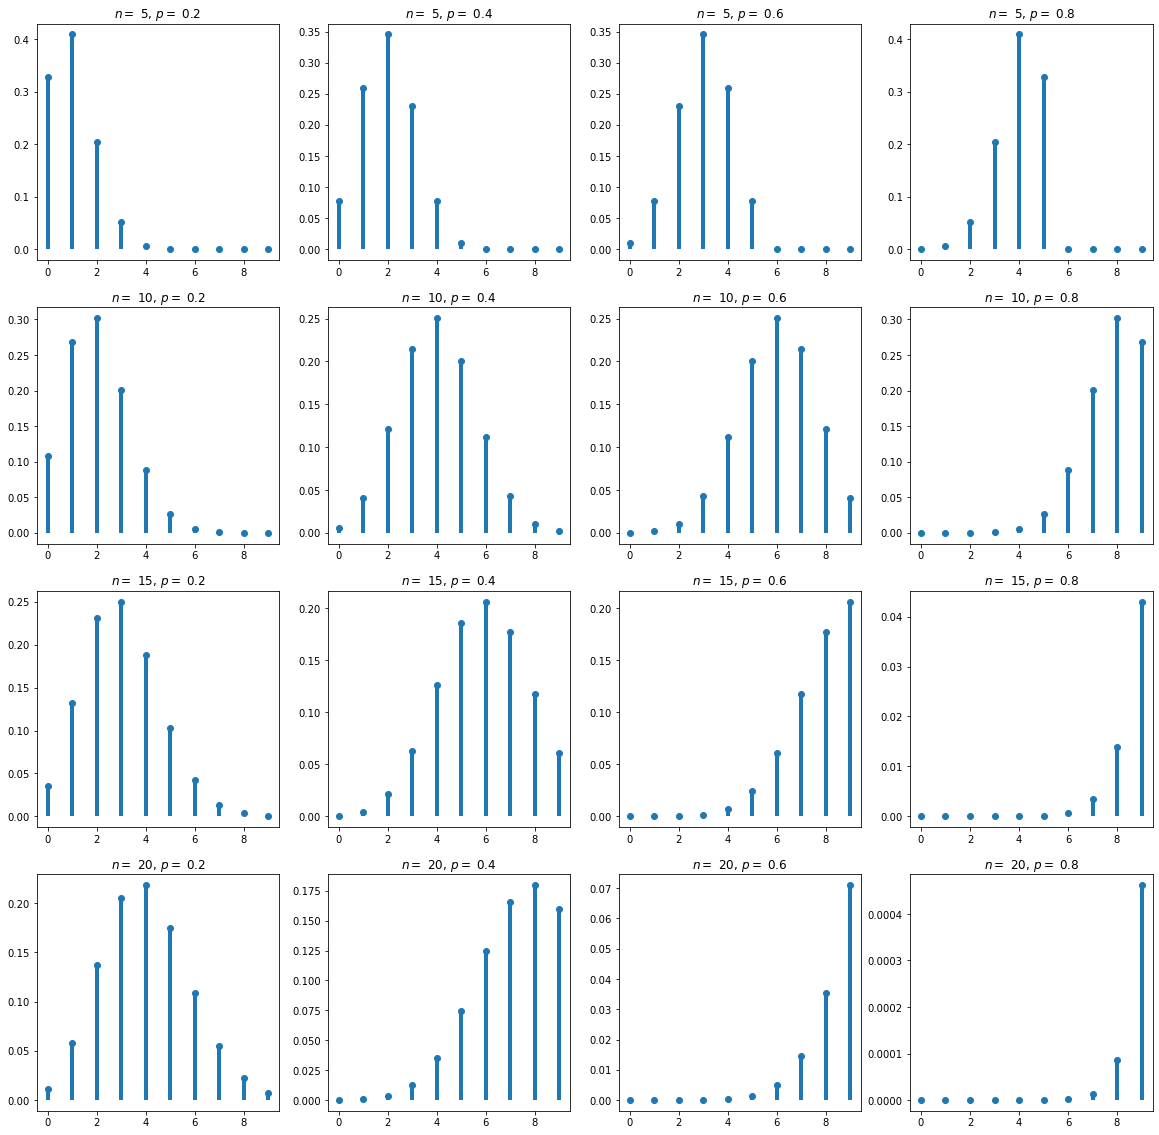

In [9]:
k = range(10)
n = 0

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    n += 5
    p = 0
    for j in range(4):
        p += 0.2
        ax[i, j].set_title("$n=$ "+str(n)+", $p=$ "+str(round(p,1)))
        ax[i, j].scatter(k, stats.binom.pmf(k, n, p))
        ax[i, j].vlines(k, 0, stats.binom.pmf(k, n, p), lw=4)

It makes sense that the mean of the distribution ought to shift to higher $k$ when we increase $n$, since for example we have a greater chance of flipping heads 4 times if the coin is flipped 7 times rather than 4. We also see that the mean shifts to higher $k$ when we increase $p$, since this means a higher chance of success in each trial.

My hypothetical question is this: If my data have a background that is binomially distributed, $X \sim \text{Bin}(15, 0.2)$, then what is the probability that a signal I measure at $k_0 = 8$ is produced by the background? Expressed in mathematical form, I would like to determine the probability
$$ p(k_0) = \sum_{k=k_0}^\infty \binom{n}{k} p^k (1 - p)^{n - k}. $$

In [11]:
k0 = 8
prob = 1 - stats.binom.cdf(k0, 15, 0.2)
print( prob, stats.norm.ppf(prob) )

0.0007849853911040539 -3.1614290163472307


There appears to be a $0.0785\%$ chance of a false measurement at $k_0 = 8$, and this corresponds to a $\sim 3\sigma$ detection.

It makes sense that certain parameters, like the mean and standard deviation, can change continuously even in a discrete distribution, like the binomial distribution. The mean, for instance, is the sum of all values of $k$ divided by the number of values. Even if all values of $k$ are integers, this can result in a non-integer number. This is akin to how in quantum mechanics the expectation value of measurements in the Stern-Gerlach experiment is 0, which is not a possible outcome of the experiment.
Because the standard deviation of a measured value depends on the mean, the standard deviation also changes continuously. The probabilities of measurement at different values of $k$ are discrete, however, since the possible outcomes themselves are discretized.